# Задание 5 Вариант 8

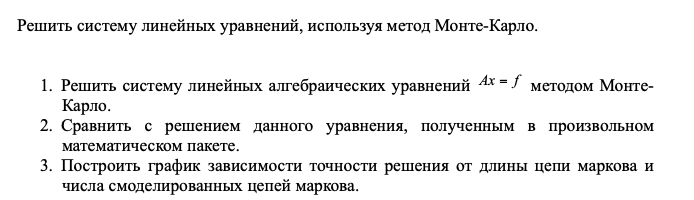

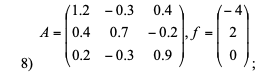

# Решение на matrixcalc.org

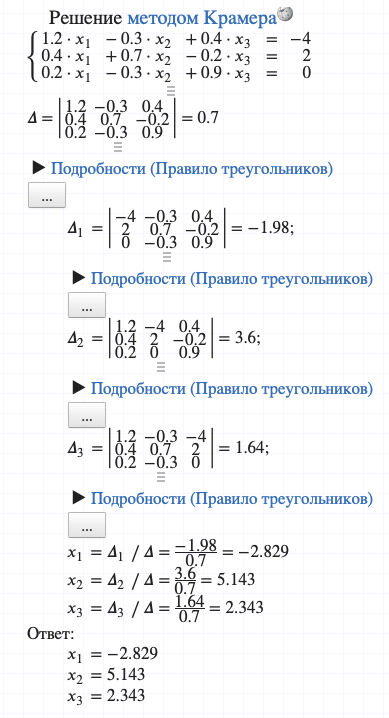

# Решение методом Монте-Карло

In [1]:
import numpy as np

In [2]:
A=np.matrix([
    [0,0.3/1.2,-0.4/1.2],
    [-0.4/0.7,0,0.2/0.7],
    [-0.2/0.9,0.3/0.9,0]
])
f=np.array([-4/1.2,2/0.7,0])

# Моделирование цепи Маркова

In [3]:
import math
import matplotlib.pyplot as plt

In [4]:
_n=1000

In [5]:
def get_values(n, generator):
    values=[]
    for i in range(n):
        values.append(next(generator))
    return values

## БСВ

In [6]:
def random_MCG(a,b,m):
    while True:
        a=(b*a)%m
        yield a/m

In [7]:
_a=262147
_b=262147
_m=math.pow(2,31)

In [8]:
MCG=random_MCG(_a,_b,_m)

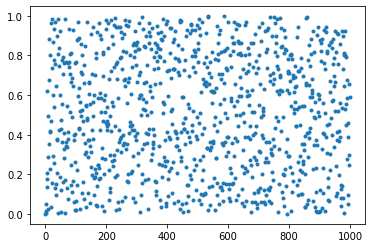

In [9]:
values_MCG=get_values(_n,MCG)
plt.plot([i for i in range(_n)],values_MCG,'.')

## m цепей Маркова длины N

In [10]:
N=1000
m=5
X_list=[0,1,2]

In [11]:
n=A.shape[0]
pi=np.array([1/n for j in range(n)])
P=np.matrix([[1/n for j in range(n)] for i in range(n)])
q=np.array([np.sum(pi[0:i+1]) for i in range(n)])
Q=np.matrix([[np.sum(P[i,0:j+1]) for j in range(n)] for i in range(n)])

In [66]:
def get_chain(N):
    uniform_array=np.random.rand(N)
    chain_array=[0]*N
    #1
    chain_array[0]=len(np.where(q<uniform_array[0])[0])
    #2
    for i in range(1,N):
        prev_value=int(chain_array[i-1])
        chain_array[i]=len(np.where(Q[prev_value]<uniform_array[i])[0])
    return chain_array

In [68]:
def get_weights(chain_array,var_num,N):
    H=np.identity(n)
    weights_array=[0]*N
    #1
    if pi[chain_array[0]]>0:
        weights_array[0]=H[var_num,chain_array[0]]/pi[chain_array[0]]
    else:
        weights_array[0]=0
    #2
    for i in range(1,N):
        prev=chain_array[i-1]
        curr=chain_array[i]
        if P[prev,curr]>0:
            weights_array[i]=weights_array[i-1]*A[prev,curr]/P[prev,curr]
        else:
            weights_array[i]=0
    return weights_array

In [38]:
def get_rand_val(chain_array,weights_array,N):
    res=0
    for i in range(N):
        curr=chain_array[i]
        res+=f[curr]*weights_array[i]
    return res

In [39]:
def calc_variable(var_num,m,N):
    res=0
    for t in range(m):
        chain_array=get_chain(N)
        weights_array=get_weights(chain_array,var_num,N)
        res+=get_rand_val(chain_array,weights_array,N)
    return res/m

In [40]:
def calc_system(m,N):
    res=np.empty(n)
    for x in range(n):
        res[x]=calc_variable(x,N,m)
    return res

## Приближенное решение

In [17]:
calc_variable(0,1000,1000)

-2.8821702712143327

In [18]:
calc_variable(1,1000,1000)

5.257590308648786

In [19]:
calc_variable(2,1000,1000)

2.4694873262368953

# График

In [20]:
x_acc=np.array([-2.829,5.143,2.343])

In [43]:
def get_sq_error(x,y):
    return np.sum((x-y)**2/len(x))

In [28]:
m_list=[10,50,100,150,200,400,600,1000]
N_list=[10,50,100,150,200,400,600,1000]

In [46]:
def get_errors(m,N_list):
    errors=[]
    for _N in N_list:
        errors.append(get_sq_error(x_acc,calc_system(m,N)))
    return errors

In [77]:
def get_errors_all(m_list,N_list):
    res=[]
    for _m in m_list:
        res.append(get_errors(_m,N_list))
    return res

## m=10

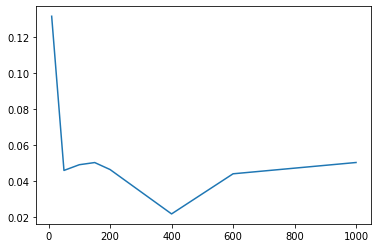

In [84]:
plt.plot(N_list,errors[0],'-')

## m=50

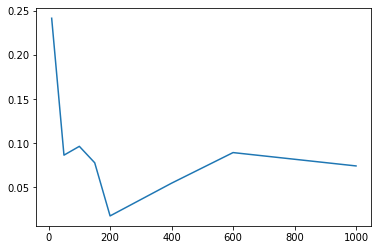

In [85]:
plt.plot(N_list,errors[1],'-')

## m=100

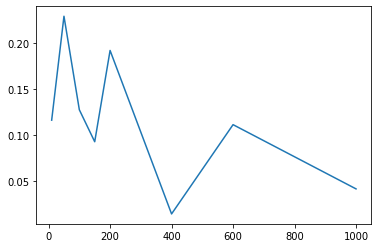

In [87]:
plt.plot(N_list,errors[2],'-')

## m=150

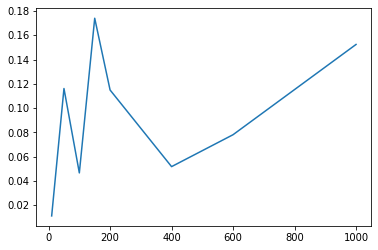

In [92]:
plt.plot(N_list,errors[3],'-')

## m=200

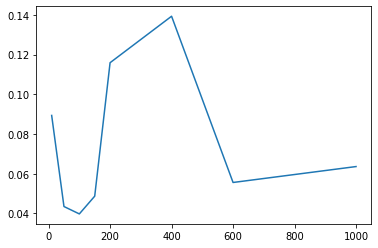

In [91]:
plt.plot(N_list,errors[4],'-')

## m=400

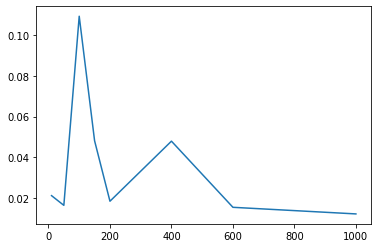

In [90]:
plt.plot(N_list,errors[5],'-')

## m=600

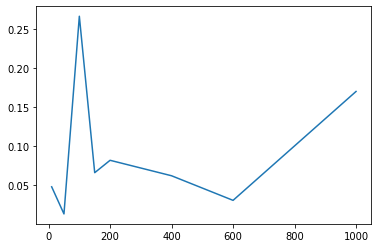

In [89]:
plt.plot(N_list,errors[6],'-')

# m=1000

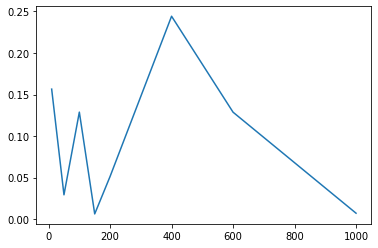

In [88]:
plt.plot(N_list,errors[7],'-')

# Contour plot

In [82]:
errors=get_errors_all(m_list,N_list)

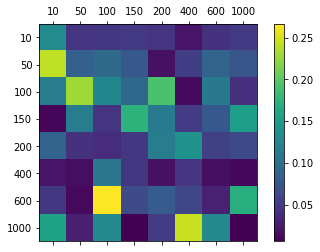

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(errors, interpolation='nearest')
fig.colorbar(cax)

ax.set_yticklabels(['']+m_list)
ax.set_xticklabels(['']+N_list)
plt.show()